#Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?

In [23]:
# mount data from google drive to colab
from google.colab import drive
drive.mount('/content/drive')

#import library
import pandas as pd # pandas 
import numpy as np # numpy
import seaborn as sns
import time


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [4]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


<Axes: >

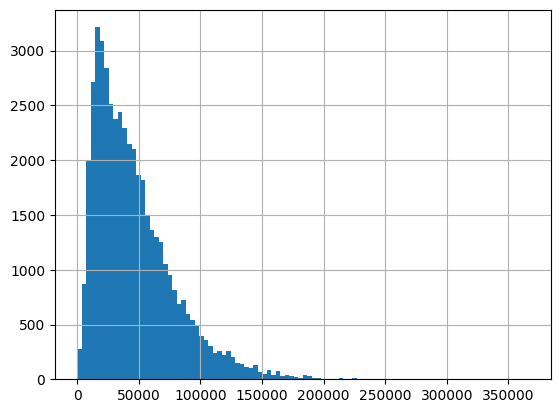

In [26]:
df = read_dataset('/content/drive/MyDrive/ML_W1/final_house_loan.csv')
#ToDo: Show histogram of dataframe
df["Loan Sanction Amount (USD)"].hist(bins=100)

## Data Analysis

In [27]:
# Data analysis
# Todo: analyze your data here
# Null checking
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

## Preprocessing

In [8]:
def preprocessing_data(df):
    # --- (Optional) Drop null datapoints or fill missing data
    # Keep your data the same if you dont want to customize it
    df.dropna(inplace=True)
    return df

In [9]:
df = preprocessing_data(df.copy())

## Feature Engineering

In [10]:
def normalize_data(df):
    # ---- Method 3
    start_time = time.time()
    # data normalization
    normalized_data = df.copy()
    normalized_data["Gender"] = normalized_data["Gender"].astype("category").cat.codes
    normalized_data["Income Stability"] = normalized_data["Income Stability"].astype("category").cat.codes
    normalized_data["Property Location"] = normalized_data["Property Location"].astype("category").cat.codes

    display(normalized_data.head())
    display(normalized_data.corr())
    print("Running time", time.time() - start_time)
    return normalized_data

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,0,19,1641.25,1,1651.25,0,59641.82,21026.420753
1,1,29,1989.71,1,1990.71,2,179858.51,60595.183366
2,0,37,1849.91,1,1856.91,0,117297.62,39181.648002
3,1,65,2735.18,0,2747.18,0,354417.72,128497.710865
4,0,62,4741.78,0,4740.78,2,82049.80,39386.919336


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
Gender,1.000000,0.007706,-0.002445,-0.019000,-0.002512,0.009142,0.005931,0.003396
Age,0.007706,1.000000,-0.044086,-0.455855,-0.044085,-0.007770,-0.003274,-0.000115
Income (USD),-0.002445,-0.044086,1.000000,0.080961,0.999986,-0.000199,0.358110,0.392897
Income Stability,-0.019000,-0.455855,0.080961,1.000000,0.081008,-0.001959,0.004813,-0.070969
Property Age,-0.002512,-0.044085,0.999986,0.081008,1.000000,-0.000233,0.358110,0.392892
Property Location,0.009142,-0.007770,-0.000199,-0.001959,-0.000233,1.000000,-0.000898,-0.001988
Property Price,0.005931,-0.003274,0.358110,0.004813,0.358110,-0.000898,1.000000,0.994429
Loan Sanction Amount (USD),0.003396,-0.000115,0.392897,-0.070969,0.392892,-0.001988,0.994429,1.000000


Running time 0.05935525894165039


<Axes: >

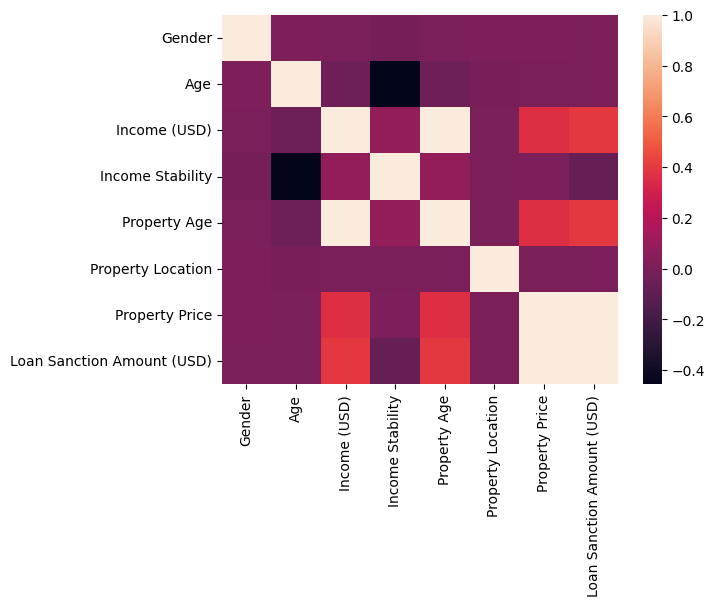

In [11]:
# Heatmap
import seaborn as sns

normalized_data = normalize_data(df.copy())
sns.heatmap(normalized_data.corr()) # Show heatmap after normalized data

# Apply machine learning model

## Train-test split

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [31]:
def prepare_X_y(df):
    # Split data into X and y. Return two dataframes
    columns = df.columns.tolist()
    columns.remove('Loan Sanction Amount (USD)')
    X = df[columns] # Todo: Select features
    y = df['Loan Sanction Amount (USD)'] # Todo: Select label
    return X, y

X, y = prepare_X_y(normalized_data)

In [14]:
def split_train_test(X, y, train_size=0.7):
    trainX, testX ,trainY, testY = train_test_split(X, y, train_size=train_size, random_state=2023)
    # Use sklearn train_test_split to split X and y into 2 sets: train set and test set. With train_size is the proportion of train_set and fix the random_state with a number
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))

    return trainX, testX ,trainY, testY

In [15]:
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)

Training:(33075, 7)
Test:(14176, 7)


## Basic Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression


def build_linear_model(X, y):
    model = LinearRegression(fit_intercept = True)
    model.fit(trainX, trainY)
    # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y

    return model

model = build_linear_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX) 
MEA_trainset_LinearRegression = mean_absolute_error(y_pred=pred, y_true=trainY)
print("mean absolute error of linear model on train set ", MEA_trainset_LinearRegression )
pred = model.predict(testX)   
MEA_testset_LinearRegression = mean_absolute_error(y_pred=pred, y_true=testY)
print("mean absolute error of linear model on test set ", MEA_testset_LinearRegression )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  163.14116153145872
mean absolute error of linear model on test set  137.10457506737418
[-2.34483815e+02 -7.93861753e+01  5.50183711e-01 -1.11431363e+04
  4.74551612e-01 -6.02929137e+01  3.36339576e-01]

11896.351699425148


In [33]:
from sklearn.linear_model import Lasso


def build_lasso_model(X, y):
  model = Lasso(alpha=0.1)
  model.fit(X, y)
    # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
  return model

model = build_lasso_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
MEA_trainset_Lasso = mean_absolute_error(y_pred=pred, y_true=trainY)
print("mean absolute error of linear model on train set ", MEA_trainset_Lasso )
pred = model.predict(testX)   
MEA_testset_Lasso = mean_absolute_error(y_pred=pred, y_true=testY)
print("mean absolute error of linear model on test set ", MEA_testset_Lasso )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  163.23946481846792
mean absolute error of linear model on test set  137.1860114645021
[-2.34105077e+02 -7.93721152e+01  8.56027193e-01 -1.11414460e+04
  1.68715071e-01 -6.01717538e+01  3.36339629e-01]

11893.906187251006


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.260e+10, tolerance: 3.490e+09
  model = cd_fast.enet_coordinate_descent(


In [34]:
from sklearn.linear_model import Ridge


def build_ridge_model(X, y):
    model = model = Ridge(alpha=0.1)
    model.fit(X, y)
    # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y

    return model

model = build_ridge_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
MEA_trainset_Ridge = mean_absolute_error(y_pred=pred, y_true=trainY)
print("mean absolute error of linear model on train set ", MEA_trainset_Ridge )
pred = model.predict(testX)   
MEA_testset_Ridge = mean_absolute_error(y_pred=pred, y_true=testY)
print("mean absolute error of linear model on test set ", MEA_testset_Ridge )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  163.15382295209034
mean absolute error of linear model on test set  137.11613614824267
[-2.34476749e+02 -7.93819426e+01  5.50315153e-01 -1.11426048e+04
  4.74413756e-01 -6.02918644e+01  3.36339608e-01]

11895.705542028249


In [35]:
from sklearn.linear_model import ElasticNet


def build_elastic_model(X, y):
    model = model = ElasticNet(alpha=0.001, l1_ratio=0.5)
    model.fit(X, y)
    # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y

    return model

model = build_elastic_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
MEA_trainset_ElasticNet = mean_absolute_error(y_pred=pred, y_true=trainY)
print("mean absolute error of linear model on train set ", MEA_trainset_ElasticNet )
pred = model.predict(testX)   
MEA_testset_ElasticNet = mean_absolute_error(y_pred=pred, y_true=testY)
print("mean absolute error of linear model on test set ", MEA_testset_ElasticNet )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  166.40787816004385
mean absolute error of linear model on test set  140.15182954588025
[-2.33350370e+02 -7.86907123e+01  8.56797069e-01 -1.10558353e+04
  1.66909435e-01 -6.01495798e+01  3.36344779e-01]

11790.183690263751


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.400e+10, tolerance: 3.490e+09
  model = cd_fast.enet_coordinate_descent(


## Comparision


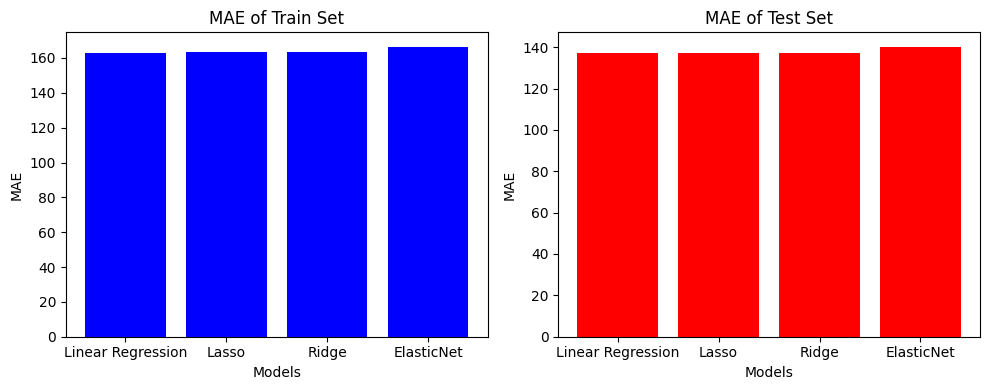

In [38]:
import matplotlib.pyplot as plt

# Define the models
models = ['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet']

# Define the MAE for train and test sets for all four models
train_mae = [MEA_trainset_LinearRegression, MEA_trainset_Lasso, MEA_trainset_Ridge, MEA_trainset_ElasticNet]
test_mae = [MEA_testset_LinearRegression, MEA_testset_Lasso, MEA_testset_Ridge, MEA_testset_ElasticNet]

# Define the figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the MAE of train set
axes[0].bar(models, train_mae, color='blue')
axes[0].set_title('MAE of Train Set')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('MAE')

# Plot the MAE of test set
axes[1].bar(models, test_mae, color='red')
axes[1].set_title('MAE of Test Set')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('MAE')

# Add spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()

Looking at the plots, it seems that there is not much difference between the four models.

## Polynomial Transform 

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [20]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression()) 
    # use make_pipeline to apply PolynomialFeatures and a Regression model train your dataset
    poly_model.fit(X, y)  

    return poly_model

poly_model = build_pipeline(trainX, trainY)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)   
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  159.7115198405628
mean absolute error of linear model (with poly transform) on test set  133.85237743200997


In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y, n):
    poly_model = make_pipeline(PolynomialFeatures(n, include_bias=False), LinearRegression()) 
    # use make_pipeline to apply PolynomialFeatures and a Regression model train your dataset
    poly_model.fit(X, y)  

    return poly_model

n_values = [3, 4, 5]

for n in n_values:
    poly_model = build_pipeline(trainX, trainY, n)
    # Compare on training dataset
    poly_pred = poly_model.predict(trainX)   
    print("mean absolute error of linear model (with poly transform) on train set for n=", n, ":", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

    poly_pred = poly_model.predict(testX)
    print("mean absolute error of linear model (with poly transform) on test set for n=", n, ":", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set for n= 3 : 250.2007222747432
mean absolute error of linear model (with poly transform) on test set for n= 3 : 227.56805118367134
mean absolute error of linear model (with poly transform) on train set for n= 4 : 2322.254547188427
mean absolute error of linear model (with poly transform) on test set for n= 4 : 2349.691235922709
mean absolute error of linear model (with poly transform) on train set for n= 5 : 5647.52386143416
mean absolute error of linear model (with poly transform) on test set for n= 5 : 5710.478016609696


As the value of n increases, the model becomes more complex and captures more detailed information about the training data, which may result in overfitting. This is reflected in the increasing MAE values for the test set as n increases.